# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

## 1) Data Marketing
#### 1) Who
Advertisers and marketing managers need actionable insights to refine their digital strategies, and this dataset helps identify key performance drivers. 
#### 2) What
By analyzing CampaignChannel, ClickThroughRate, and ConversionRate, they can determine which platforms yield the highest engagement and reallocate ad budgets accordingly. Understanding customer behaviors—such as WebsiteVisits, TimeOnSite, and SocialShares—enables them to craft more compelling marketing content that resonates with their target audience. 
#### 3) How
Using AdSpend vs. ConversionRate as a benchmark, marketers can assess ROI and make data-driven decisions that optimize campaign effectiveness and drive revenue growth.

## 2) Churn
#### 1) What
This dataset tracks customer demographics, engagement, financial behavior, and churn. It includes details like age, tenure, usage frequency, payment delays, and total spend. Businesses use it to improve retention, predict churn, and optimize pricing. Businesses can use this data to improve retention, predict churn, optimize pricing, and enhance customer service.

#### 2) Who
It benefits business analysts, marketers, data scientists, customer support, finance teams, product developers, and executives. Analysts segment customers, data scientists build predictive models, and support teams enhance service. Finance teams assess risks, product developers refine features, and executives make strategic decisions.

#### 3) How
Users analyze trends, apply machine learning, and visualize insights. Analysts group customers, data scientists predict churn, and support teams track interactions. Finance teams forecast revenue, product teams improve offerings, and executives refine strategies.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

### 1 Digital Marketing

In [2]:
digital = pd.read_csv("digital_marketing_campaign_dataset.csv")
digital.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [3]:
# Summarize the dataset
print("Dataset Info:")
digital.info()
print("\nDataset Description:")
print(digital.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    800

In [4]:
# Check for duplicate rows
duplicate_rows = digital.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [5]:
# Check for duplicate values in specific columns (modify as needed)
for column in digital.columns:
    if digital[column].duplicated().sum() > 0:
        print(f"Column '{column}' has {digital[column].duplicated().sum()} duplicate values.")

Column 'Age' has 7948 duplicate values.
Column 'Gender' has 7998 duplicate values.
Column 'Income' has 211 duplicate values.
Column 'CampaignChannel' has 7995 duplicate values.
Column 'CampaignType' has 7996 duplicate values.
Column 'WebsiteVisits' has 7950 duplicate values.
Column 'SocialShares' has 7900 duplicate values.
Column 'EmailOpens' has 7980 duplicate values.
Column 'EmailClicks' has 7990 duplicate values.
Column 'PreviousPurchases' has 7990 duplicate values.
Column 'LoyaltyPoints' has 4017 duplicate values.
Column 'AdvertisingPlatform' has 7999 duplicate values.
Column 'AdvertisingTool' has 7999 duplicate values.
Column 'Conversion' has 7998 duplicate values.


In [6]:
# Calculate mean, median, and mode for each column
print("\nMean values:")
print(digital.mean(numeric_only=True))
print("\nMedian values:")
print(digital.median(numeric_only=True))
print("\nMode values:")
print(digital.mode().iloc[0])  # Mode can have multiple values, so we take the first row


Mean values:
CustomerID           11999.500000
Age                     43.625500
Income               84664.196750
AdSpend               5000.944830
ClickThroughRate         0.154829
ConversionRate           0.104389
WebsiteVisits           24.751625
PagesPerVisit            5.549299
TimeOnSite               7.727718
SocialShares            49.799750
EmailOpens               9.476875
EmailClicks              4.467375
PreviousPurchases        4.485500
LoyaltyPoints         2490.268500
Conversion               0.876500
dtype: float64

Median values:
CustomerID           11999.500000
Age                     43.000000
Income               84926.500000
AdSpend               5013.440044
ClickThroughRate         0.154505
ConversionRate           0.104046
WebsiteVisits           25.000000
PagesPerVisit            5.534257
TimeOnSite               7.682956
SocialShares            50.000000
EmailOpens               9.000000
EmailClicks              4.000000
PreviousPurchases        4.000000
Loy

In [7]:
# Check for missing/null values
missing_values = digital.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64


In [8]:
# Handle missing values (modify as needed)
digital.fillna(digital.mean(numeric_only=True), inplace=True)  # Fill with mean values

In [9]:
# Identify inconsistent data (example: birth year after action date)
if 'birth_year' in digital.columns and 'action_date' in digital.columns:
    inconsistent_rows = digital[digital['birth_year'] > digital['action_date'].dt.year]
    print(f"\nInconsistent data (action before birth): {len(inconsistent_rows)} rows")

In [10]:
# Encode categorical variables using one-hot encoding
categorical_columns = digital.select_dtypes(include=['object']).columns
digital_encoded = pd.get_dummies(digital, columns=categorical_columns)

In [11]:
# Check for class imbalance
for column in categorical_columns:
    print(f"\nClass distribution in '{column}':")
    print(digital[column].value_counts())


Class distribution in 'Gender':
Gender
Female    4839
Male      3161
Name: count, dtype: int64

Class distribution in 'CampaignChannel':
CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

Class distribution in 'CampaignType':
CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

Class distribution in 'AdvertisingPlatform':
AdvertisingPlatform
IsConfid    8000
Name: count, dtype: int64

Class distribution in 'AdvertisingTool':
AdvertisingTool
ToolConfid    8000
Name: count, dtype: int64


In [12]:
# Conclusions
print("\n### Conclusions ###")
if duplicate_rows > 0 or missing_values.sum() > 0:
    print("Data needs cleaning and modification.")
else:
    print("Data appears usable.")


### Conclusions ###
Data appears usable.


#### 2 Churn

In [13]:
df = pd.read_csv("customer_churn_dataset-master.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [14]:
# Summarize the dataset
print("Dataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB

Dataset Description:
          CustomerID            Age         Tenure  Usage Frequency  \
count  505206.000000  505206.000000  505206

In [15]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [16]:
# Check for duplicate values in specific columns (modify as needed)
for column in df.columns:
    if df[column].duplicated().sum() > 0:
        print(f"Column '{column}' has {df[column].duplicated().sum()} duplicate values.")

Column 'CustomerID' has 62995 duplicate values.
Column 'Age' has 505158 duplicate values.
Column 'Gender' has 505204 duplicate values.
Column 'Tenure' has 505146 duplicate values.
Column 'Usage Frequency' has 505176 duplicate values.
Column 'Support Calls' has 505195 duplicate values.
Column 'Payment Delay' has 505175 duplicate values.
Column 'Subscription Type' has 505203 duplicate values.
Column 'Contract Length' has 505203 duplicate values.
Column 'Total Spend' has 436843 duplicate values.
Column 'Last Interaction' has 505176 duplicate values.
Column 'Churn' has 505204 duplicate values.


In [17]:
# Calculate mean, median, and mode for each column
print("\nMean values:")
print(df.mean(numeric_only=True))
print("\nMedian values:")
print(df.median(numeric_only=True))
print("\nMode values:")
print(df.mode().iloc[0])  # Mode can have multiple values, so we take the first row


Mean values:
CustomerID          200779.451782
Age                     39.704172
Tenure                  31.350435
Usage Frequency         15.714825
Support Calls            3.833317
Payment Delay           13.496843
Total Spend            620.072766
Last Interaction        14.610581
Churn                    0.555203
dtype: float64

Median values:
CustomerID          193039.5
Age                     40.0
Tenure                  32.0
Usage Frequency         16.0
Support Calls            3.0
Payment Delay           13.0
Total Spend            648.9
Last Interaction        14.0
Churn                    1.0
dtype: float64

Mode values:
CustomerID                2.0
Age                      50.0
Gender                   Male
Tenure                   49.0
Usage Frequency          11.0
Support Calls             0.0
Payment Delay            20.0
Subscription Type    Standard
Contract Length        Annual
Total Spend             234.0
Last Interaction          7.0
Churn                     1.0

In [18]:
# Check for missing/null values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [19]:
# Handle missing values (modify as needed)
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill with mean values

In [20]:
# Identify inconsistent data (example: birth year after action date)
if 'birth_year' in df.columns and 'action_date' in df.columns:
    inconsistent_rows = df[df['birth_year'] > df['action_date'].dt.year]
    print(f"\nInconsistent data (action before birth): {len(inconsistent_rows)} rows")

In [21]:
# Encode categorical variables using one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [22]:
# Check for class imbalance
for column in categorical_columns:
    print(f"\nClass distribution in '{column}':")
    print(df[column].value_counts())


Class distribution in 'Gender':
Gender
Male      280273
Female    224933
Name: count, dtype: int64

Class distribution in 'Subscription Type':
Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64

Class distribution in 'Contract Length':
Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64


In [23]:
# Conclusions
print("\n### Conclusions ###")
if duplicate_rows > 0 or missing_values.sum() > 0:
    print("Data needs cleaning and modification.")
else:
    print("Data appears usable.")


### Conclusions ###
Data needs cleaning and modification.


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

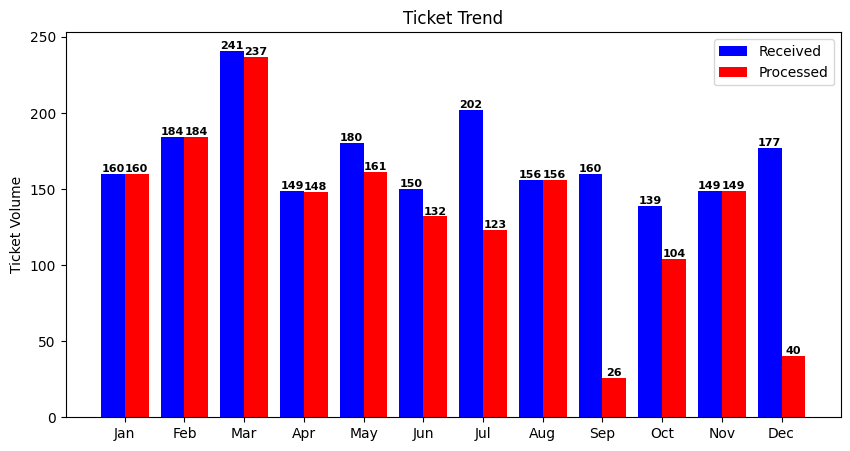

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the first graph (Ticket Trend)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
received = [160, 184, 241, 149, 180, 150, 202, 156, 160, 139, 149, 177]
processed = [160, 184, 237, 148, 161, 132, 123, 156, 26, 104, 149, 40]

# Plot the first graph
fig, ax = plt.subplots(figsize=(10, 5))
width = 0.4
x = np.arange(len(months))

bars1 = ax.bar(x - width/2, received, width, label="Received", color="blue")
bars2 = ax.bar(x + width/2, processed, width, label="Processed", color="red")

ax.set_xticks(x)
ax.set_xticklabels(months)
ax.set_ylabel("Ticket Volume")
ax.set_title("Ticket Trend")
ax.legend()

# Add labels above bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), 
            ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')

for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), 
            ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')

plt.show()


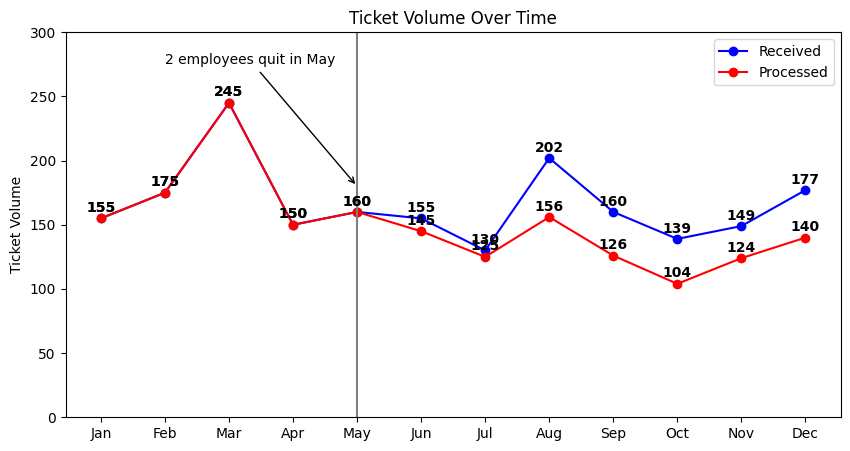

In [25]:

# Data for the second graph (Ticket Volume Over Time)
received_2014 = [155, 175, 245, 150, 160, 155, 130, 202, 160, 139, 149, 177]
processed_2014 = [155, 175, 245, 150, 160, 145, 125, 156, 126, 104, 124, 140]

# Plot the second graph
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(months, received_2014, marker='o', linestyle='-', color='blue', label="Received")
ax.plot(months, processed_2014, marker='o', linestyle='-', color='red', label="Processed")

ax.set_ylabel("Ticket Volume")
ax.set_title("Ticket Volume Over Time")
ax.legend()

# Add labels above points
for i, txt in enumerate(received_2014):
    ax.text(months[i], received_2014[i] + 5, str(txt), ha='center', fontsize=10, fontweight='bold', color='black')

for i, txt in enumerate(processed_2014):
    ax.text(months[i], processed_2014[i] + 5, str(txt), ha='center', fontsize=10, fontweight='bold', color='black')

# Add annotation about employees quitting
ax.annotate("2 employees quit in May", xy=("May", 180), xytext=("Feb", 275),
            arrowprops=dict(facecolor='black', arrowstyle="->"))

ax.set_ylim(0, 300)

plt.axvline(x= 4, color='grey', linestyle='-')

plt.show()
